<a href="https://colab.research.google.com/github/bjh0507/Study/blob/main/%EC%97%B0%EB%B4%89DATA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


salary_currency : 급여 통화

Employee Residence : 직원 거주지





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.work_year.value_counts() #3개의 범주가 존재

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [ ]:
fig = px.box(df, x='salary_in_usd', color='work_year', template='seaborn', title='년도별 연봉 시각화')
fig.show()

년도가 증가함에 따라 평균 연봉이 높아짐을 알 수 있음

In [ ]:
fig = px.box(df, x='salary_in_usd', color='employment_type', title='고용 형태에 따른 연봉 차이')
fig.show()

CT의 직급으로 고용한 사람의 평균 연봉이 높음을 알 수 있음

In [ ]:
fig = px.box(df, x='salary_in_usd', color='experience_level', title='일 경험에 따른 연봉 차이')
fig.show()

일 경험에 따라 연봉의 차이가 발생한다는 것을 알 수 있음 -> 직무에 대한 일 경험이 연봉에 큰 영향을 미친다는 것을 파악할 수 있음

In [ ]:
fig = px.histogram(df, x='job_title', y='salary', color='job_title', title='직업에 따른 연봉 시각화').update_xaxes(categoryorder='total descending')
fig.show()

데이터 사이언티스트와 데이터 엔지니어의 연봉이 높음을 알 수 있음

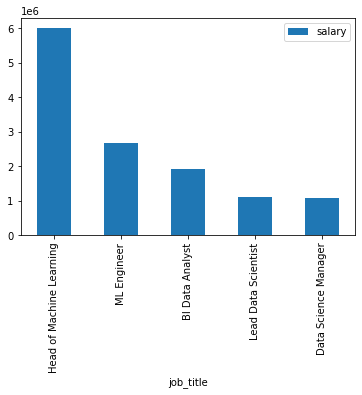

In [ ]:
df_salary = df.groupby('job_title')['salary'].mean().round(2)
df_salary = pd.DataFrame(df_salary)
df_salary.sort_values(by='salary', ascending=False).head(5).plot.bar()

각 직업별 평균 연봉을 살펴본 결과, 위 5개의 결과가 출력됨

In [ ]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

각 직업별 데이터 개수를 살펴보면, 데이터 사이언티스와 데이터 엔지니어, 데이터 분석가를 직업으로 삼는 사람이 많음을 알 수 있음 -> 그래서 직업별 연봉을 살펴볼때는 그냥 바로 히스토 그램을 그려보는 것 보다 평균 연봉으로 시각화 하였음

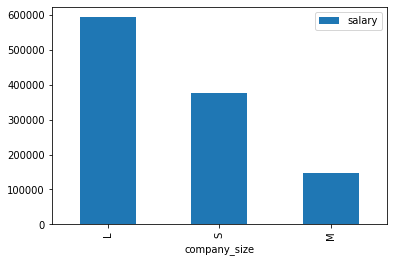

In [ ]:
#첫번째 시각화
df_company = df.groupby('company_size')['salary'].mean()
df_company = pd.DataFrame(df_company)
df_company.sort_values(by='salary', ascending=False).plot.bar()

회사 규모가 대기업인 경우, 평균 연봉이 가장 높은 것을 파악할 수 있음

In [ ]:
#두번 째 시각화 방법

company_size = pd.DataFrame(df.groupby('company_size')[['company_size', 'salary']].mean().sort_values('salary', ascending=False).round(2))
fig = px.bar(company_size, x=company_size.index, y='salary', color=company_size.index, title='회사 규모별 평균연봉 시각화2', text='salary' )
fig.show()

groupby를 활용하여 새로운 데이터 프레임을 만들면 변수가 인덱스로 들어가게 됨

-> **이를 활용하여 px라이브러리 시각화를 진행하려면 데이터 프레임이 들어있는 이름.index를 활용해주면 됨!**

**해당 데이터 프레임의 index값들이 x축의 라벨로 들어가기 때문!**

In [ ]:
#회사 위치 지도 시각화
!pip install country_converter
!pip install pycountry
import country_converter as coco
import pycountry
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=bd013c4be9d2d4c41b6d9bcb01c6b6de8fa36a4b3f10e9c4325dd237cc2fce58
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
converted_country = coco.convert(names=df['company_location'], to='ISO3')
df['company_location'] = converted_country

In [ ]:
exlevel_location = df.groupby(['experience_level', 'company_location']).size()
exlevel_location

experience_level  company_location
EN                ASM                   1
                  AUS                   2
                  CAN                   3
                  CHE                   1
                  CHN                   1
                                     ... 
SE                NZL                   1
                  PRT                   1
                  SVN                   1
                  TUR                   1
                  USA                 218
Length: 93, dtype: int64

In [ ]:
entry_location = exlevel_location['EN']
senior_location = exlevel_location['SE']
mid_location = exlevel_location['MI']
executive_location = exlevel_location['EX']

In [ ]:
entry_location

company_location
ASM     1
AUS     2
CAN     3
CHE     1
CHN     1
COL     1
CZE     1
DEU    11
DNK     2
DZA     1
ESP     1
FRA     5
GBR     5
IND     9
IRQ     1
ITA     1
JPN     1
KEN     1
LUX     2
MYS     1
NGA     1
NLD     1
PAK     1
PRT     1
UKR     1
USA    31
VNM     1
dtype: int64

In [ ]:
entry_location.index

Index(['ASM', 'AUS', 'CAN', 'CHE', 'CHN', 'COL', 'CZE', 'DEU', 'DNK', 'DZA',
       'ESP', 'FRA', 'GBR', 'IND', 'IRQ', 'ITA', 'JPN', 'KEN', 'LUX', 'MYS',
       'NGA', 'NLD', 'PAK', 'PRT', 'UKR', 'USA', 'VNM'],
      dtype='object', name='company_location')

In [ ]:
entry_location.values

array([ 1,  2,  3,  1,  1,  1,  1, 11,  2,  1,  1,  5,  5,  9,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1, 31,  1])

In [ ]:
fig1 = px.choropleth(locations = entry_location.index, color=entry_location.values, color_continuous_scale = px.colors.sequential.Peach, template='plotly_white', title='Entry-level 회사의 위치')
fig1.show()

In [ ]:
fig2 = px.choropleth(locations = senior_location.index, color=senior_location.values, color_continuous_scale = px.colors.sequential.dense, template='plotly_white', title='Senior-level 회사의 위치')
fig2.show()

In [ ]:
fig3 = px.choropleth(locations = mid_location.index, color=mid_location.values, color_continuous_scale= px.colors.sequential.GnBu, template='plotly_white', title='Mid-level 회사의 위치')
fig3.show()

In [ ]:
fig4 = px.choropleth(locations = executive_location.index, color = executive_location.values, color_continuous_scale=px.colors.sequential.PuRd, template='plotly_white', title='Executive-level 회사의 위치')
fig4.show()

In [ ]:
locations = df.company_location.value_counts()
locations.head(10)

USA    355
GBR     47
CAN     30
DEU     28
IND     24
FRA     15
ESP     14
GRC     11
JPN      6
NLD      4
Name: company_location, dtype: int64

미국에 회사가 가장 많이 위치해있음